In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
with open('MTM01.pkl', 'rb') as f:
    df = pickle.load(f)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 15 columns):
Belmullet               2233 non-null object
Birr                    2233 non-null object
Valentia Observatory    2233 non-null object
Casement                2233 non-null object
Claremorris             2233 non-null object
Clones                  2233 non-null object
Cork airport            2233 non-null object
Dublin airport          2233 non-null object
Galway                  2233 non-null object
Kilkenny                2233 non-null object
Malin head              2233 non-null object
Mullingar               2233 non-null object
Roches Point            2233 non-null object
Rosslare                2233 non-null object
Shannon airport         2233 non-null object
dtypes: object(15)
memory usage: 261.8+ KB


In [3]:
df.tail()

,Belmullet,Birr,Valentia Observatory,Casement,Claremorris,Clones,Cork airport,Dublin airport,Galway,Kilkenny,Malin head,Mullingar,Roches Point,Rosslare,Shannon airport
2228,27.00,"""..""",27.00,21.00,23.00,"""..""",22.00,20.00,"""..""","""..""",20.00,23.00,22.00,"""..""",22.00
2229,149.40,"""..""",199.60,49.20,137.10,"""..""",125.60,157.10,"""..""","""..""",123.70,82.80,110.80,"""..""",117.10
2230,16.80,"""..""",24.50,8.90,15.70,"""..""",15.30,105.60,"""..""","""..""",12.10,11.50,19.50,"""..""",12.00
2231,26.00,"""..""",26.00,17.00,25.00,"""..""",24.00,16.00,"""..""","""..""",27.00,23.00,23.00,"""..""",24.00;
2232,,,,,,,,,,,,,,,999


In [4]:
def string_cleaner(something):
    try:
        return float(something)
    except:
        return np.nan

In [5]:
for c in df.columns:
    try:
        df[c] = df[c].apply(string_cleaner)
    except:
        print(c)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 15 columns):
Belmullet               2232 non-null float64
Birr                    1863 non-null float64
Valentia Observatory    2232 non-null float64
Casement                2016 non-null float64
Claremorris             1557 non-null float64
Clones                  1809 non-null float64
Cork airport            2088 non-null float64
Dublin airport          2224 non-null float64
Galway                  1152 non-null float64
Kilkenny                1809 non-null float64
Malin head              2232 non-null float64
Mullingar               2232 non-null float64
Roches Point            1668 non-null float64
Rosslare                1805 non-null float64
Shannon airport         2232 non-null float64
dtypes: float64(15)
memory usage: 261.8 KB


In [6]:
df.head()

,Belmullet,Birr,Valentia Observatory,Casement,Claremorris,Clones,Cork airport,Dublin airport,Galway,Kilkenny,Malin head,Mullingar,Roches Point,Rosslare,Shannon airport
0,160.2,95.6,214.8,NaN,146.9,104.8,NaN,40.0,NaN,116.4,127.2,109.4,120.7,102.5,115.6
1,20.0,19.2,40.9,NaN,28.5,16.2,NaN,12.1,NaN,17.7,23.1,24.3,21.2,23.1,20.6
2,28.0,20.0,30.0,NaN,27.0,24.0,NaN,14.0,NaN,17.0,26.0,26.0,20.0,16.0,20.0
3,75.2,85.6,130.8,NaN,98.3,97.1,NaN,101.6,NaN,87.6,143.2,82.0,107.1,119.7,92.8
4,18.2,21.8,27.7,NaN,19.5,15.6,NaN,21.6,NaN,19.2,36.2,18.5,23.1,23.4,17.3


In [7]:
values = ["195801","195802","195803","195804","195805","195806","195807","195808","195809","195810","195811","195812","195901",
"195902","195903","195904","195905","195906","195907","195908","195909","195910","195911","195912","196001","196002","196003",
"196004","196005","196006","196007","196008","196009","196010","196011","196012","196101","196102","196103","196104","196105",
"196106","196107","196108","196109","196110","196111","196112","196201","196202","196203","196204","196205","196206","196207",
"196208","196209","196210","196211","196212","196301","196302","196303","196304","196305","196306","196307","196308","196309",
"196310","196311","196312","196401","196402","196403","196404","196405","196406","196407","196408","196409","196410","196411",
"196412","196501","196502","196503","196504","196505","196506","196507","196508","196509","196510","196511","196512","196601",
"196602","196603","196604","196605","196606","196607","196608","196609","196610","196611","196612","196701","196702","196703",
"196704","196705","196706","196707","196708","196709","196710","196711","196712","196801","196802","196803","196804","196805",
"196806","196807","196808","196809","196810","196811","196812","196901","196902","196903","196904","196905","196906","196907",
"196908","196909","196910","196911","196912","197001","197002","197003","197004","197005","197006","197007","197008","197009",
"197010","197011","197012","197101","197102","197103","197104","197105","197106","197107","197108","197109","197110","197111",
"197112","197201","197202","197203","197204","197205","197206","197207","197208","197209","197210","197211","197212","197301",
"197302","197303","197304","197305","197306","197307","197308","197309","197310","197311","197312","197401","197402","197403",
"197404","197405","197406","197407","197408","197409","197410","197411","197412","197501","197502","197503","197504","197505",
"197506","197507","197508","197509","197510","197511","197512","197601","197602","197603","197604","197605","197606","197607",
"197608","197609","197610","197611","197612","197701","197702","197703","197704","197705","197706","197707","197708","197709",
"197710","197711","197712","197801","197802","197803","197804","197805","197806","197807","197808","197809","197810","197811",
"197812","197901","197902","197903","197904","197905","197906","197907","197908","197909","197910","197911","197912","198001",
"198002","198003","198004","198005","198006","198007","198008","198009","198010","198011","198012","198101","198102","198103",
"198104","198105","198106","198107","198108","198109","198110","198111","198112","198201","198202","198203","198204","198205",
"198206","198207","198208","198209","198210","198211","198212","198301","198302","198303","198304","198305","198306","198307",
"198308","198309","198310","198311","198312","198401","198402","198403","198404","198405","198406","198407","198408","198409",
"198410","198411","198412","198501","198502","198503","198504","198505","198506","198507","198508","198509","198510","198511",
"198512","198601","198602","198603","198604","198605","198606","198607","198608","198609","198610","198611","198612","198701",
"198702","198703","198704","198705","198706","198707","198708","198709","198710","198711","198712","198801","198802","198803",
"198804","198805","198806","198807","198808","198809","198810","198811","198812","198901","198902","198903","198904","198905",
"198906","198907","198908","198909","198910","198911","198912","199001","199002","199003","199004","199005","199006","199007",
"199008","199009","199010","199011","199012","199101","199102","199103","199104","199105","199106","199107","199108","199109",
"199110","199111","199112","199201","199202","199203","199204","199205","199206","199207","199208","199209","199210","199211",
"199212","199301","199302","199303","199304","199305","199306","199307","199308","199309","199310","199311","199312","199401",
"199402","199403","199404","199405","199406","199407","199408","199409","199410","199411","199412","199501","199502","199503",
"199504","199505","199506","199507","199508","199509","199510","199511","199512","199601","199602","199603","199604","199605",
"199606","199607","199608","199609","199610","199611","199612","199701","199702","199703","199704","199705","199706","199707",
"199708","199709","199710","199711","199712","199801","199802","199803","199804","199805","199806","199807","199808","199809",
"199810","199811","199812","199901","199902","199903","199904","199905","199906","199907","199908","199909","199910","199911",
"199912","200001","200002","200003","200004","200005","200006","200007","200008","200009","200010","200011","200012","200101",
"200102","200103","200104","200105","200106","200107","200108","200109","200110","200111","200112","200201","200202","200203",
"200204","200205","200206","200207","200208","200209","200210","200211","200212","200301","200302","200303","200304","200305",
"200306","200307","200308","200309","200310","200311","200312","200401","200402","200403","200404","200405","200406","200407",
"200408","200409","200410","200411","200412","200501","200502","200503","200504","200505","200506","200507","200508","200509",
"200510","200511","200512","200601","200602","200603","200604","200605","200606","200607","200608","200609","200610","200611",
"200612","200701","200702","200703","200704","200705","200706","200707","200708","200709","200710","200711","200712","200801",
"200802","200803","200804","200805","200806","200807","200808","200809","200810","200811","200812","200901","200902","200903",
"200904","200905","200906","200907","200908","200909","200910","200911","200912","201001","201002","201003","201004","201005",
"201006","201007","201008","201009","201010","201011","201012","201101","201102","201103","201104","201105","201106","201107",
"201108","201109","201110","201111","201112","201201","201202","201203","201204","201205","201206","201207","201208","201209",
"201210","201211","201212","201301","201302","201303","201304","201305","201306","201307","201308","201309","201310","201311",
"201312","201401","201402","201403","201404","201405","201406","201407","201408","201409","201410","201411","201412","201501",
"201502","201503","201504","201505","201506","201507","201508","201509","201510","201511","201512","201601","201602","201603",
"201604","201605","201606","201607","201608","201609","201610","201611","201612","201701","201702","201703","201704","201705",
"201706","201707","201708","201709","201710","201711","201712","201801","201802","201803","201804","201805","201806","201807",
"201808","201809","201810","201811","201812","201901","201902","201903","201904","201905","201906","201907","201908","201909",
"201910","201911","201912"]

In [8]:
len(values)

744

In [9]:
def name_months(month):
    month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
    index = int(month)-1
    return month_names[index]

In [10]:
int("01")

1

In [11]:
print(len(values)* 3)
print(len(df))

2232
2233


In [12]:
df = df.iloc[:-1]

In [13]:
years = []
months = []
categories = ["total", "highest", "raindays"]
category_list = []
for value in values:
    for category in categories:
        years.append(value[:4])
        months.append(name_months(value[4:]))
        category_list.append(category)

In [14]:
df['Year'] = years
df['Category'] = category_list
df['Month'] = months

In [15]:
df.head()

,Belmullet,Birr,Valentia Observatory,Casement,Claremorris,Clones,Cork airport,Dublin airport,Galway,Kilkenny,Malin head,Mullingar,Roches Point,Rosslare,Shannon airport,Year,Category,Month
0,160.2,95.6,214.8,NaN,146.9,104.8,NaN,40.0,NaN,116.4,127.2,109.4,120.7,102.5,115.6,1958,total,Jan
1,20.0,19.2,40.9,NaN,28.5,16.2,NaN,12.1,NaN,17.7,23.1,24.3,21.2,23.1,20.6,1958,highest,Jan
2,28.0,20.0,30.0,NaN,27.0,24.0,NaN,14.0,NaN,17.0,26.0,26.0,20.0,16.0,20.0,1958,raindays,Jan
3,75.2,85.6,130.8,NaN,98.3,97.1,NaN,101.6,NaN,87.6,143.2,82.0,107.1,119.7,92.8,1958,total,Feb
4,18.2,21.8,27.7,NaN,19.5,15.6,NaN,21.6,NaN,19.2,36.2,18.5,23.1,23.4,17.3,1958,highest,Feb


In [16]:
total = df[df['Category']=="total"].copy()
highest = df[df['Category']=="highest"].copy()
raindays = df[df['Category']=="raindays"].copy()


In [17]:
import matplotlib.pyplot as plt

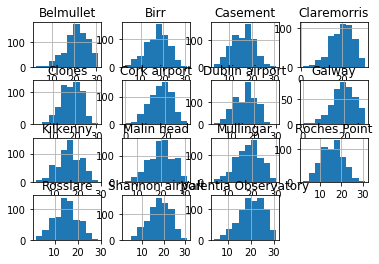

In [18]:
raindays.hist();

In [19]:
highest.describe()

,Belmullet,Birr,Valentia Observatory,Casement,Claremorris,Clones,Cork airport,Dublin airport,Galway,Kilkenny,Malin head,Mullingar,Roches Point,Rosslare,Shannon airport
count,744.000000,621.000000,744.000000,672.000000,519.000000,603.000000,696.000000,743.000000,384.000000,603.000000,744.000000,744.000000,556.000000,602.000000,744.000000
mean,18.125269,15.015459,24.619220,16.013244,18.955106,15.899834,22.895833,16.309017,20.165625,16.082255,17.011425,17.005914,19.140108,18.429900,16.487366
std,8.650119,7.433086,12.178622,10.685605,9.170136,7.816739,12.060383,10.532681,9.113054,8.233493,8.262674,8.726534,10.555401,11.000487,7.606992
min,3.300000,0.600000,0.800000,1.000000,1.600000,1.000000,0.000000,1.300000,0.000000,0.800000,2.700000,1.400000,0.600000,0.700000,0.400000
25%,12.300000,10.200000,16.800000,9.200000,12.950000,11.050000,14.475000,9.600000,14.200000,10.300000,11.600000,11.100000,12.300000,11.600000,11.400000
50%,16.450000,13.500000,22.950000,13.450000,17.500000,14.700000,21.200000,14.000000,18.750000,14.300000,15.600000,15.500000,17.500000,16.500000,15.400000
75%,22.000000,18.300000,30.300000,20.100000,23.800000,19.000000,29.200000,20.250000,24.925000,20.650000,20.425000,20.700000,24.325000,22.475000,20.500000
max,67.500000,47.100000,131.600000,103.300000,74.600000,76.800000,86.700000,105.600000,63.300000,66.400000,73.000000,69.800000,84.400000,89.200000,52.300000


In [20]:
highest[highest['Valentia Observatory'] == highest['Valentia Observatory'].max()][['Year','Month']]

,Year,Month
2116,2016,Oct


In [21]:
for c in total.columns[:-3]:
    temp = total[total[c] == total[c].max()][['Year','Month', c]]
    print("{:16}\t{:4} {:}  {:>4}".format(c, temp.Year.values[0], temp.Month.values[0], temp[c].values[0]))

Belmullet       	1989 Oct  259.5
Birr            	1959 Dec  179.9
Valentia Observatory	2009 Nov  345.4
Casement        	2015 Dec  205.2
Claremorris     	1985 Aug  258.6
Clones          	1995 Oct  190.0
Cork airport    	2015 Dec  403.7
Dublin airport  	1978 Dec  217.0
Galway          	2009 Nov  329.4
Kilkenny        	1997 Aug  203.3
Malin head      	2015 Dec  262.5
Mullingar       	2015 Dec  271.2
Roches Point    	2015 Dec  342.2
Rosslare        	2002 Oct  287.2
Shannon airport 	2009 Nov  245.6


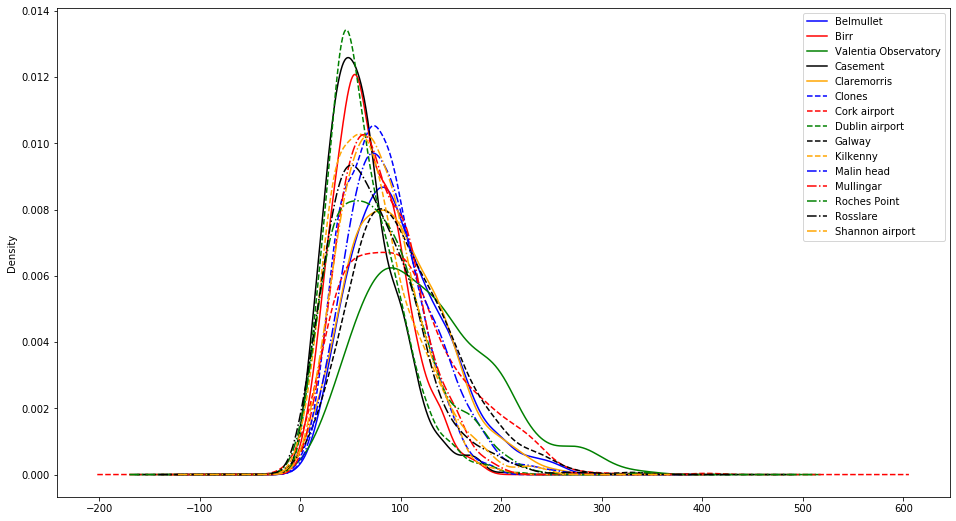

In [22]:
colors = ['blue', 'red', 'green', 'black', 'orange']
markers = ["-", "--", "-."]
i = 0
j = 0
fig, ax = plt.subplots(1,1, figsize=(16, 9))
for c in total.columns[:-3]:
    total[c].plot(kind='kde', ls=markers[j], color=colors[i], label=c)
    if i < 4:
        i += 1
    else:
        i = 0
        j += 1
plt.legend();

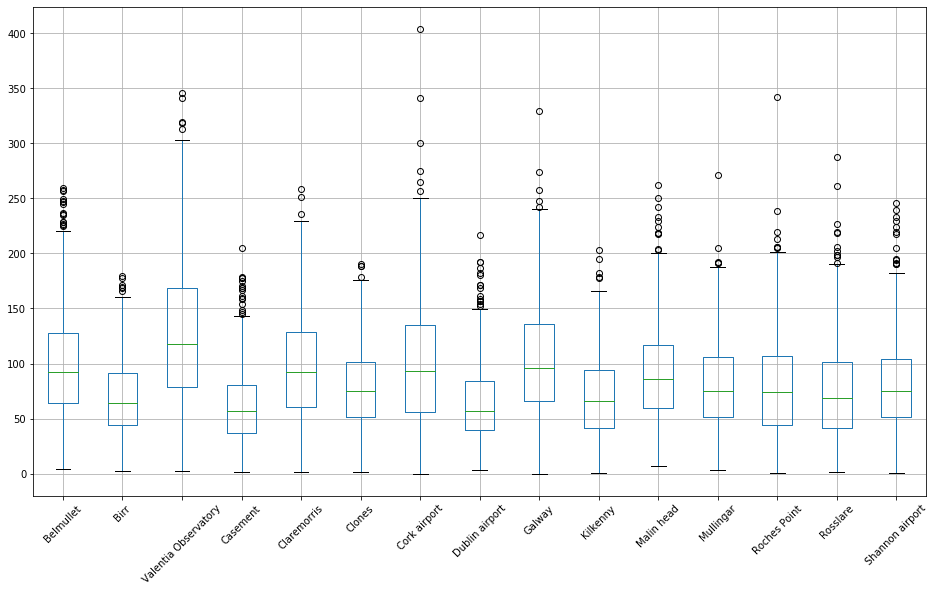

In [23]:
fig, ax = plt.subplots(1,1, figsize=(16, 9))
total.boxplot()
plt.xticks(rotation=45);

In [24]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 2229
Data columns (total 18 columns):
Belmullet               744 non-null float64
Birr                    621 non-null float64
Valentia Observatory    744 non-null float64
Casement                672 non-null float64
Claremorris             519 non-null float64
Clones                  603 non-null float64
Cork airport            696 non-null float64
Dublin airport          744 non-null float64
Galway                  385 non-null float64
Kilkenny                603 non-null float64
Malin head              744 non-null float64
Mullingar               744 non-null float64
Roches Point            556 non-null float64
Rosslare                602 non-null float64
Shannon airport         744 non-null float64
Year                    744 non-null object
Category                744 non-null object
Month                   744 non-null object
dtypes: float64(15), object(3)
memory usage: 110.4+ KB


In [25]:
total1 = total.dropna(axis=1).copy()
total1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 0 to 2229
Data columns (total 9 columns):
Belmullet               744 non-null float64
Valentia Observatory    744 non-null float64
Dublin airport          744 non-null float64
Malin head              744 non-null float64
Mullingar               744 non-null float64
Shannon airport         744 non-null float64
Year                    744 non-null object
Category                744 non-null object
Month                   744 non-null object
dtypes: float64(6), object(3)
memory usage: 58.1+ KB


In [26]:
total2 = total1.T
total2.tail()

,0,3,6,9,12,15,18,21,24,27,...,2202,2205,2208,2211,2214,2217,2220,2223,2226,2229
Mullingar,109.4,82,34.1,25.7,86.6,131.9,132.9,127.1,104.4,74.2,...,157.1,58.6,43.3,79.8,77.8,151.9,131.7,95.5,122.2,82.8
Shannon airport,115.6,92.8,52,30.2,97.6,63.2,89.3,107.2,91.9,72.3,...,177.1,47.8,30.8,55.5,48.8,149.6,103.8,98.3,104.7,117.1
Year,1958,1958,1958,1958,1958,1958,1958,1958,1958,1958,...,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019
Category,total,total,total,total,total,total,total,total,total,total,...,total,total,total,total,total,total,total,total,total,total
Month,Jan,Feb,Mar,Apr,May,Jun,July,Aug,Sep,Oct,...,Mar,Apr,May,Jun,July,Aug,Sep,Oct,Nov,Dec


In [27]:
total_holder = []
for c in total2.columns:
    total_holder.append(total2[c].iloc[:-3].mean())

In [28]:
total_holder[:5]

[127.86666666666667,
 104.26666666666665,
 62.50000000000001,
 34.883333333333326,
 99.7]

In [29]:
total1['Total'] = total_holder

In [30]:
del(total1['Category'])

In [31]:
total1.to_csv('total_rainfall.csv', index=False)

In [32]:
total1.sort_values('Total').head()

,Belmullet,Valentia Observatory,Dublin airport,Malin head,Mullingar,Shannon airport,Year,Month,Total
1011,4.2,20.1,10.2,9.9,9.3,0.8,1986,Feb,9.083333
255,17.9,2.3,4.7,15.9,10.1,4.7,1965,Feb,9.266667
1200,19.6,7.6,3.6,18.4,4.5,10.1,1991,May,10.633333
1353,17.7,24.7,7.2,13.3,6.9,4.2,1995,Aug,12.333333
669,12.0,16.4,6.6,19.4,7.7,13.5,1976,Aug,12.600000


In [34]:
total1.Total.max()

257.7